In [15]:
import pandas as pd
import matplotlib.pyplot as plt

invoices = pd.read_csv("fct_invoice.csv")
customers = pd.read_json("dim_customer.json")


Easy Questions

1. How many unique customers are in the dataset?

In [16]:
invoices['customer_id'].nunique()


5191

2. What are the different categories of products available? How many unique categories are there?

In [17]:
invoices['category'].unique()
invoices['category'].nunique()


8

3. Which payment method is the most popular? How many times was it used?

In [18]:
invoices['payment_method'].value_counts()


payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

Medium Questions

1. What are the three most popular categories, by total sales?

In [19]:
invoices.groupby('category')['quantity'].sum().sort_values(ascending=False).head(3)


category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Name: quantity, dtype: int64

In [25]:
import pandas as pd
import json

with open("dim_customer.json") as f:
    data = json.load(f)

age = data['age']

customers = pd.DataFrame(list(age.items()), columns=['id', 'age'])

customers['id'] = customers['id'].astype(int)

# delete missing ages
customers = customers.dropna()

customers.head()


,id,age
0,0,48.0
2,2,57.0
3,3,73.0
4,4,20.0
6,6,83.0


2. What are the total sales attributed to customers over the age of 45?

In [27]:
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')

merged[merged['age'] > 45]['price'].sum()


22340695.65

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph)

In [28]:
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)


In [29]:
monthly_sales = invoices.groupby(invoices['invoice_date'].dt.to_period('M'))['price'].sum()


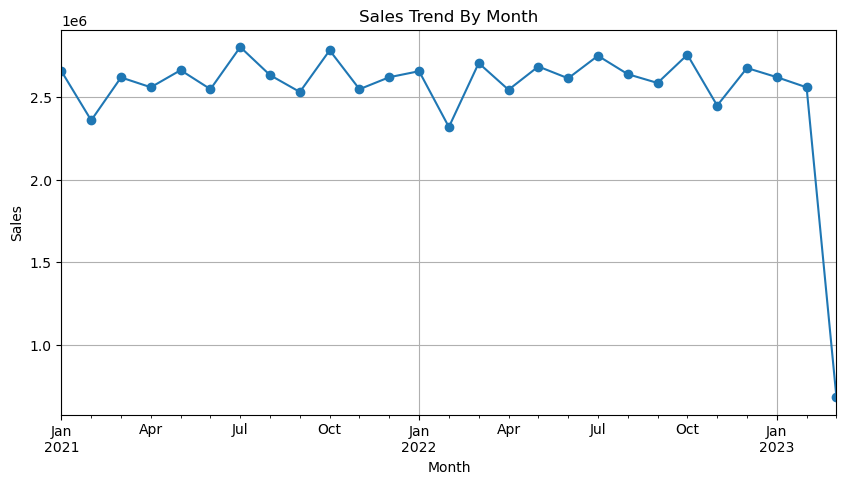

In [31]:
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title='Sales Trend By Month')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


Hard Questions

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [32]:
customers['age_group'] = pd.cut(customers['age'], bins=range(0, 101, 10))

In [33]:
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')


In [36]:
pd.pivot_table(
    merged,
    index='category',
    columns='age_group',
    values='price',
    aggfunc='sum'

)


/var/folders/zb/b64v510j2cn1tcph4cmhznxc0000gp/T/ipykernel_1421/25415469.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


age_group,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
category,,,,,,,,,,
Books,0.0,5287.35,21285.75,23149.20,21876.60,21740.25,20422.20,15756.00,5999.40,0.0
Clothing,0.0,804214.40,2744231.60,3079420.96,3010402.56,2966590.88,2699219.60,2123366.08,1023572.88,0.0
Cosmetics,0.0,47653.52,159834.46,196103.18,177114.96,171910.48,161867.46,116084.30,58387.76,0.0
Food & Beverage,0.0,5460.12,20459.76,24251.51,22891.71,21406.39,20705.57,15083.32,6971.59,0.0
Shoes,0.0,391310.84,1682876.68,1889335.16,1817314.76,1690078.72,1481819.73,1275361.25,581564.73,0.0
Souvenir,0.0,5266.77,14791.53,17231.37,17196.18,16105.29,14521.74,10568.73,5372.34,0.0
Technology,0.0,454650.00,1394400.00,1650600.00,1573950.00,1294650.00,1442700.00,1017450.00,433650.00,0.0
Toys,0.0,25768.96,100316.16,117447.68,103470.08,98201.60,92682.24,77808.64,34693.12,0.0
